# Using Linear Regression to Predict Housing Prices

### Lynn Anderson

# Overview

The objective of this project was to create a multiple linear regression model to demonstrate how certain characteristics impact the value of a house in King County, WA. Linear regression is a method used understand the relative importance of each independent variable in predicting the value of target variable. For this project, the target variable was sale price of the house. Simple linear regression finds the best fitting linear equation using only one explanatory variable, whereas multiple linear regression aims to find a more complex linear combination of independent variables that most closely fits the data. 

## Business Understanding

A rental company in King County, WA has acquired some houses in the area. They are looking to renovate some of the homes before renting them out, and would like to know which ones to prioritize, and how they can increase the value of those homes. I am going to identify two features that have the most influence the value of homes in the area, and make recommendations on what the company should prioritize when remodeling their houses. I chose to investigate variables that would be more practical to alter in a home renovation- while factors such as being adjacent to a waterfront or greenbelt are likely to increase home value, it is not feasable to alter those characteristics for a house in a given location without major urban planning.

# Data Preparation

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats

In [2]:
# load and investigate data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

There are 30,155 records in the dataframe. Sewer system and heat source columns have a few null values.

In [88]:
df['year sold'] = df['date'].str.split('/').apply(lambda x: x[-1])
df['year sold'].value_counts()

2021    18187
2022     9933
Name: year sold, dtype: int64

In [4]:
# check for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Heat source and Sewer system contain 32 and 14 null values, respectively. Because the null values represent less than 0.1% of the data set, I am going to drop them. 

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

1

There is one duplicate entry that needs to be dropped.

In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# check that there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

The dataset now contains 30,110 records

In [11]:
#Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,2.882221e+09,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326077
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Mean price was $1.1 million yet the median was only \\$860,000. This suggests that some houses sold for a very high price pulled the mean upwards.


In [12]:
# Examine the towns. This may be interesting to look at later
df['city'] = df['address'].str.split().apply(lambda x: x[-5])
df['city'] = df['city'].str.replace(',', '', regex=False)
df['city'].value_counts().head(10)

Seattle      9367
Renton       1943
Kent         1583
Bellevue     1528
Auburn       1511
Kirkland     1269
Way          1167
Redmond       985
Sammamish     976
Valley        887
Name: city, dtype: int64

In [13]:
df['city'].unique()

array(['Renton', 'Seattle', 'Issaquah', 'Shoreline', 'Burien', 'Kent',
       'Way', 'Duvall', 'Omaha', 'Auburn', 'Bellevue', 'Valley',
       'Woodinville', 'Redmond', 'Medina', 'Park', 'SeaTac', 'Hill',
       'Bend', 'Bothell', 'Kirkland', 'New', 'Moines', 'McLeansboro',
       'Newcastle', 'Island', 'Carnation', 'Sammamish', 'Snoqualmie',
       'Enumclaw', 'Covington', 'City', 'Rapids', 'Scituate', 'Longmont',
       'Hills', 'Philadelphia', 'Algona', 'Kenmore', 'Minneapolis',
       'Tukwila', 'Diamond', 'Prairie', 'Pacific', 'Homestead',
       'Portland', 'Vashon', 'Cucamonga', 'North', 'Plattsmouth',
       'Springfield', 'Columbus', 'Rockford', 'Honolulu', 'Harrison',
       'Point', 'Flint', 'Rochester', 'Ravensdale', 'Leadwood', 'Desloge',
       'Dilworth', 'Arts', 'Liberty', 'Golden', 'Preston', 'Brooksville',
       'Rhode', 'Gilbert', 'Skykomish', 'Haven', 'George', 'Continental',
       'South', 'Evansville', 'Montague', 'Dyersville', 'Oshkosh',
       'Milton', 'Whitt

In [14]:
df['city'].nunique()

240

240 cities are represented in this dataset.

Text(0.5, 1.0, 'Scatterplot by Location and Price')

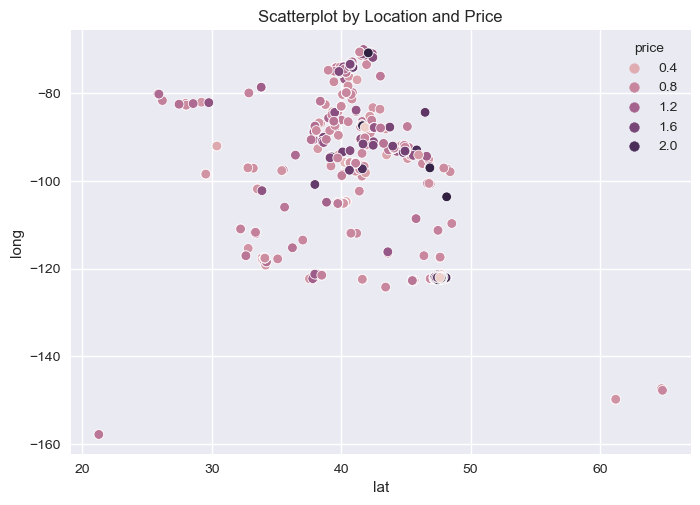

In [101]:
sns.scatterplot(data=df, x='lat', y='long', hue='price').set_title('Scatterplot by Location and Price');

### Description of grade and condition columns

Sourced from https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g 

### Grade

Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

### Condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

#### Based on the descriptions above, I would expect houses with a higher grade and very good condition to sell for a higher price.

## Exploratory Data Analysis

### Correlations

Find variables most correlated with the target variable, sale price. Also check for independent variables that are highly correlated with each other.

In [15]:
# table of all correlations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034035,-0.007081,-0.012312,-0.028181,-0.119284,0.031972,-0.023307,-0.015016,-0.008022,-0.041633,0.023130,-0.028867,-0.000754,0.000632
price,-0.034035,1.000000,0.288992,0.480284,0.608586,0.086562,0.180555,0.538614,0.244938,0.263655,0.313787,0.095728,0.085039,0.063419,-0.022271
bedrooms,-0.007081,0.288992,1.000000,0.588097,0.637091,0.006214,0.146884,0.546243,0.237991,0.318122,0.183665,0.145521,0.015366,0.108887,-0.106793
bathrooms,-0.012312,0.480284,0.588097,1.000000,0.772209,0.038038,0.404269,0.674231,0.260611,0.456256,0.327983,0.443333,0.041590,-0.005497,0.017695
sqft_living,-0.028181,0.608586,0.637091,0.772209,1.000000,0.122282,0.303887,0.883732,0.338337,0.510960,0.396530,0.291196,0.039101,0.102197,-0.087621
sqft_lot,-0.119284,0.086562,0.006214,0.038038,0.122282,1.000000,-0.031552,0.131761,0.004465,0.089321,0.154577,0.001903,0.009389,0.030043,-0.034409
floors,0.031972,0.180555,0.146884,0.404269,0.303887,-0.031552,1.000000,0.448232,-0.248523,0.132350,0.125009,0.544300,-0.025035,-0.218183,0.233595
sqft_above,-0.023307,0.538614,0.546243,0.674231,0.883732,0.131761,0.448232,1.000000,-0.067357,0.559966,0.312589,0.387230,0.011043,0.092311,-0.082719
sqft_basement,-0.015016,0.244938,0.237991,0.260611,0.338337,0.004465,-0.248523,-0.067357,1.000000,0.025736,0.210299,-0.230873,0.054046,0.059654,-0.045098
sqft_garage,-0.008022,0.263655,0.318122,0.456256,0.510960,0.089321,0.132350,0.559966,0.025736,1.000000,0.216507,0.447709,-0.098298,0.092088,-0.096637


I am interested in finding the variables most highly correlated with price.

In [16]:
# find variables highly correlated with price
df.corr()['price']

id              -0.034035
price            1.000000
bedrooms         0.288992
bathrooms        0.480284
sqft_living      0.608586
sqft_lot         0.086562
floors           0.180555
sqft_above       0.538614
sqft_basement    0.244938
sqft_garage      0.263655
sqft_patio       0.313787
yr_built         0.095728
yr_renovated     0.085039
lat              0.063419
long            -0.022271
Name: price, dtype: float64

Living room size had the highest correlation with price, followed by Squarefoot above ground. Number of bathrooms had the third highest correlation. Since living room size has the highest correlation with price, and because it is one of the less difficult features to modify in a remodel, I will chose it as a starting point for my baseline linear regression module.                 

#### Visualization of correlations

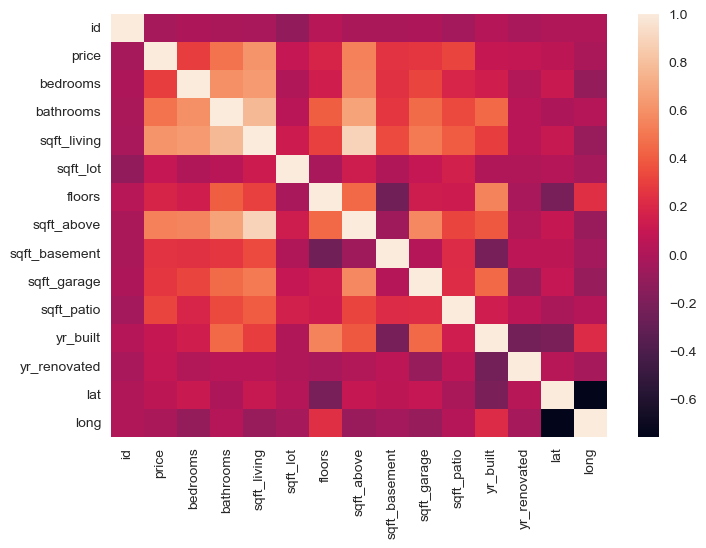

In [17]:
# heatmap of correlations
sns.heatmap(df.corr());

Lighter color represents a higher correlation. Squarefoot above ground and living room size stand out as having a high correlation. Living room size and number of bathrooms also appear to have a high correlation, as does squarefoot above ground and bathrooms. I need to examine this, as including highly correlated variables in the same model will affect its performance.

#### Check for multicollinearity

Independent variables that are strongly correlated with each other would violate an assumption of linear regression, so it is important to identify any such correlations.

In [18]:
# Find pairs of highly correlated independendent variables

corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

corr_df.columns = ['cc']

#df.drop_duplicates(inplace=True)

perfect_corrs = corr_df.cc == 1
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883732
"(sqft_living, sqft_above)",0.883732
"(bathrooms, sqft_living)",0.772209
"(sqft_living, bathrooms)",0.772209
"(lat, long)",0.760532
"(long, lat)",0.760532


In [19]:
# verify no variables are perfectly correlated with a different variable
perfect_corrs[(perfect_corrs.values == True)]

pairs
(id, id)                          True
(price, price)                    True
(lat, lat)                        True
(yr_renovated, yr_renovated)      True
(yr_built, yr_built)              True
(sqft_patio, sqft_patio)          True
(sqft_garage, sqft_garage)        True
(sqft_basement, sqft_basement)    True
(floors, floors)                  True
(sqft_lot, sqft_lot)              True
(sqft_living, sqft_living)        True
(bathrooms, bathrooms)            True
(bedrooms, bedrooms)              True
(sqft_above, sqft_above)          True
(long, long)                      True
Name: cc, dtype: bool

No two predictor variables are perfectly correlated with each other. Squarefoot of living room and Squarefoot above ground, not surprisingly, have a high correlation. Squarefoot of living room and number of bathrooms are also highly correlated. Because I am including Squarefoot of living room in my baseline model, I will not include Squarefoot above ground or number of bathrooms in the same module.

## Data Visualization

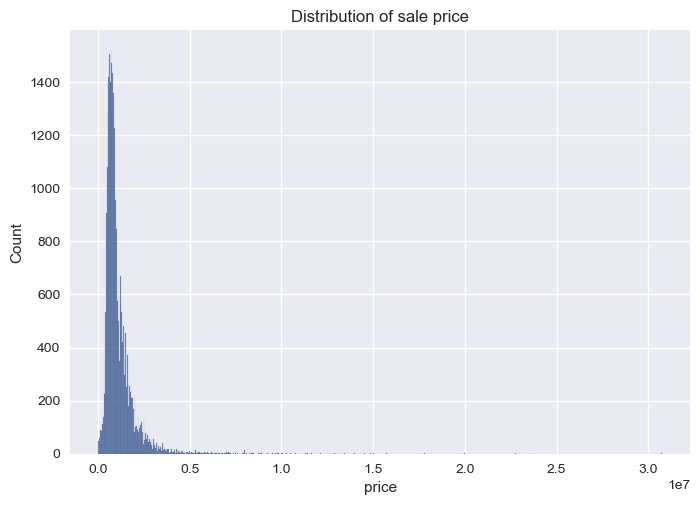

In [20]:
# distribution of price
sns.histplot(df['price'], bins='auto').set_title('Distribution of sale price');

The distribution of price appears to have a positive skew, meaning that houses selling for very high prices are pulling the mean up. Also, there is a narrow peak with thin tails, indicating a high level of kurtosis and many outliers. 

In [21]:
plt.figure(figsize=(100, 100))
#sns.pairplot(df);

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

#### Prepare categorical variables for visualization

In [22]:
# map categorical variables into a logical order for bar plots

order_g = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
order_c = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
mapping_g = {grade: i for i, grade in enumerate(order_g)}
key_g = df['grade'].map(mapping_g)
mapping_c = {condition: i for i, condition in enumerate(order_c)}
key_c = df['condition'].map(mapping_c)
df = df.iloc[key_g.argsort()]

# make new dataframe for ordering condition

df_cond_order = df.copy()
df_cond_order.iloc[key_c.argsort()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,city
27095,5557900030,9/29/2021,549950.0,2,2.0,1270,2300,1.5,NO,NO,...,1270,0,0,180,2019,0,"31110 6th Place Southwest, Federal Way, Washin...",47.323160,-122.342710,Way
12580,9332800120,5/19/2022,1645000.0,3,2.5,2090,10897,1.0,NO,NO,...,1580,900,750,170,1968,0,"12813 Northeast 28th Street, Bellevue, Washing...",47.634600,-122.168590,Bellevue
264,4321200170,4/27/2022,300000.0,2,1.0,890,5000,1.0,NO,NO,...,890,0,0,40,1909,0,"3253 37th Avenue Southwest, Seattle, Washingto...",47.574070,-122.378475,Seattle
28123,1604600971,11/16/2021,303000.0,6,3.0,1880,4500,1.0,NO,NO,...,1000,880,0,0,1971,0,"4426 33rd Avenue South, Seattle, Washington 98...",47.563760,-122.291165,Seattle
18160,6021503125,11/11/2021,865000.0,2,1.0,1110,4100,1.0,NO,NO,...,1110,1110,0,0,1941,0,"7723 Jones Avenue Northwest, Seattle, Washingt...",47.685670,-122.386750,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,9510960450,8/30/2021,577000.0,4,2.5,2730,9316,2.0,NO,NO,...,2730,0,610,0,2003,0,"28225 51st Place South, Auburn, Washington 980...",47.348630,-122.270430,Auburn
4703,1420069153,3/31/2022,585000.0,3,2.0,1500,9955,1.0,NO,NO,...,1500,0,400,100,2021,0,"3450 Division Street, Philadelphia, Pennsylvan...",40.012135,-75.188125,Philadelphia
30095,1422250040,6/25/2021,871567.0,4,3.0,3120,5913,2.0,NO,NO,...,3120,0,400,190,2021,0,"1367 Bandera Avenue Southeast, North Bend, Was...",47.479700,-121.735855,Bend
22644,6018500130,10/25/2021,425000.0,4,1.0,1500,5000,1.5,NO,NO,...,1500,1030,0,0,1939,0,"2007 Lincoln Avenue, Enumclaw, Washington 9802...",47.200865,-121.994900,Enumclaw


Now the plots will be easier to interpret since the categories will be arranged in a logical order.

#### Visualizion of categorical columns
Investigate mean sale price and counts of the different grades and conditions

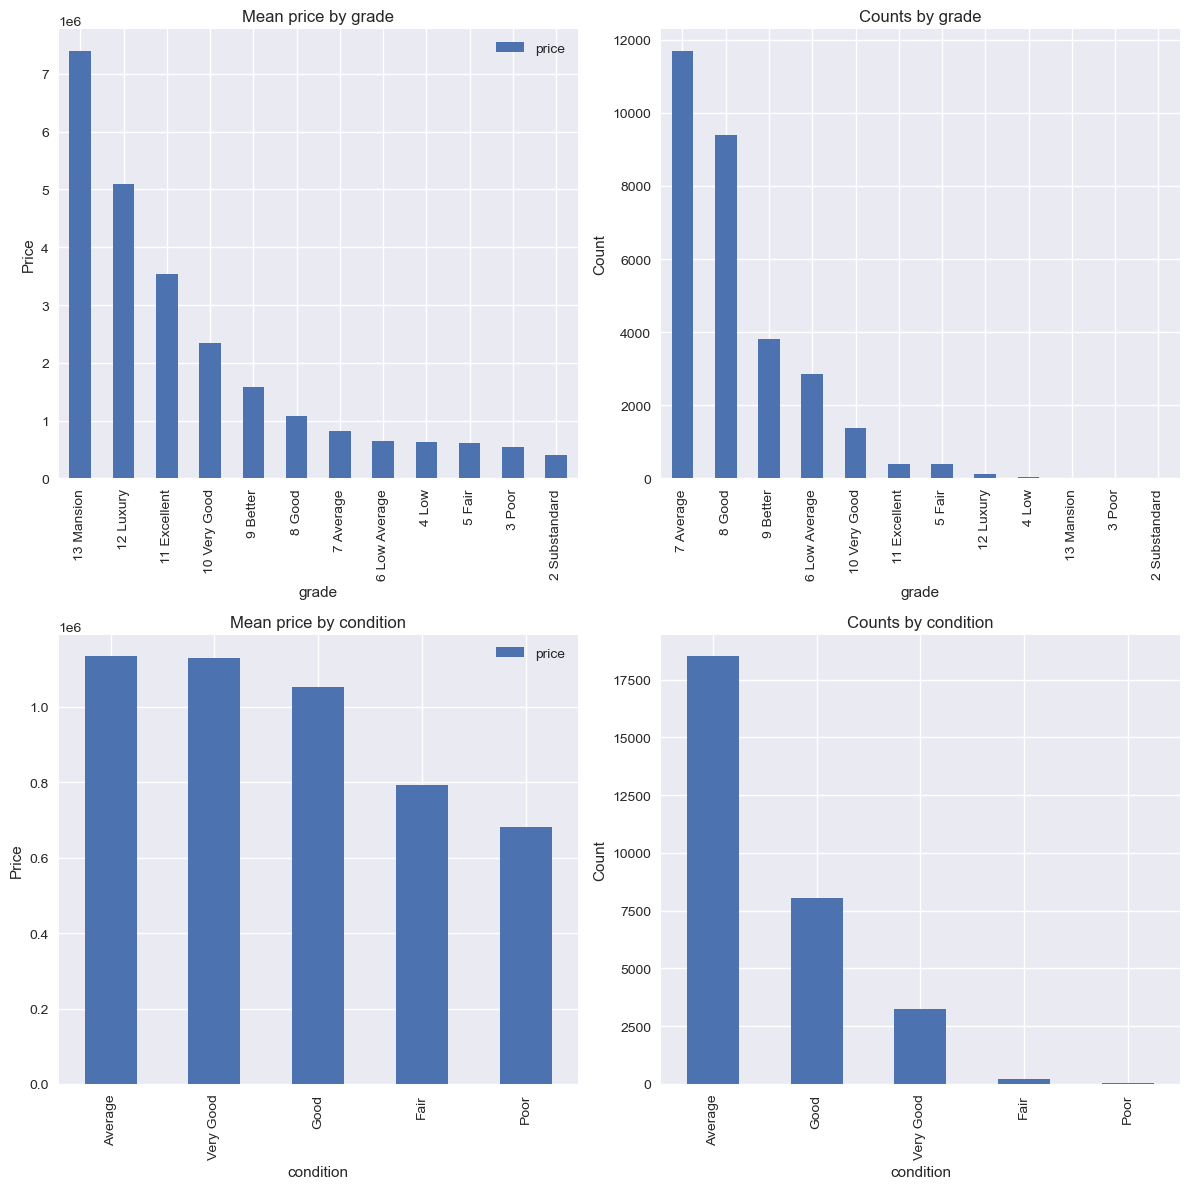

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
for i, col in enumerate(["condition", "grade"]):
     df.groupby(col).mean().sort_values(by='price', ascending=False).plot.bar(y="price", ylabel='Price', title= 'Mean price by {}'.format(col), ax=axes[i-1][0])
     df[col].value_counts().plot.bar(title='Counts by {}'.format(col), ylabel='Count', ax=axes[i-1][1]).set_xlabel(col)
plt.tight_layout()

There appears to be a relationship between grade and price, with better grades resulting in a higher price. Most of the houses in the dataset were around average grade or slightly above average.

The relationship between condition and price is less clear- houses in average condition had the highest mean price. This suggests that the condition of a house might not be as important to sale price as other features. Most of the houses were in average or good condition.

#### Scatter plots to show relationship between select independent variables and price

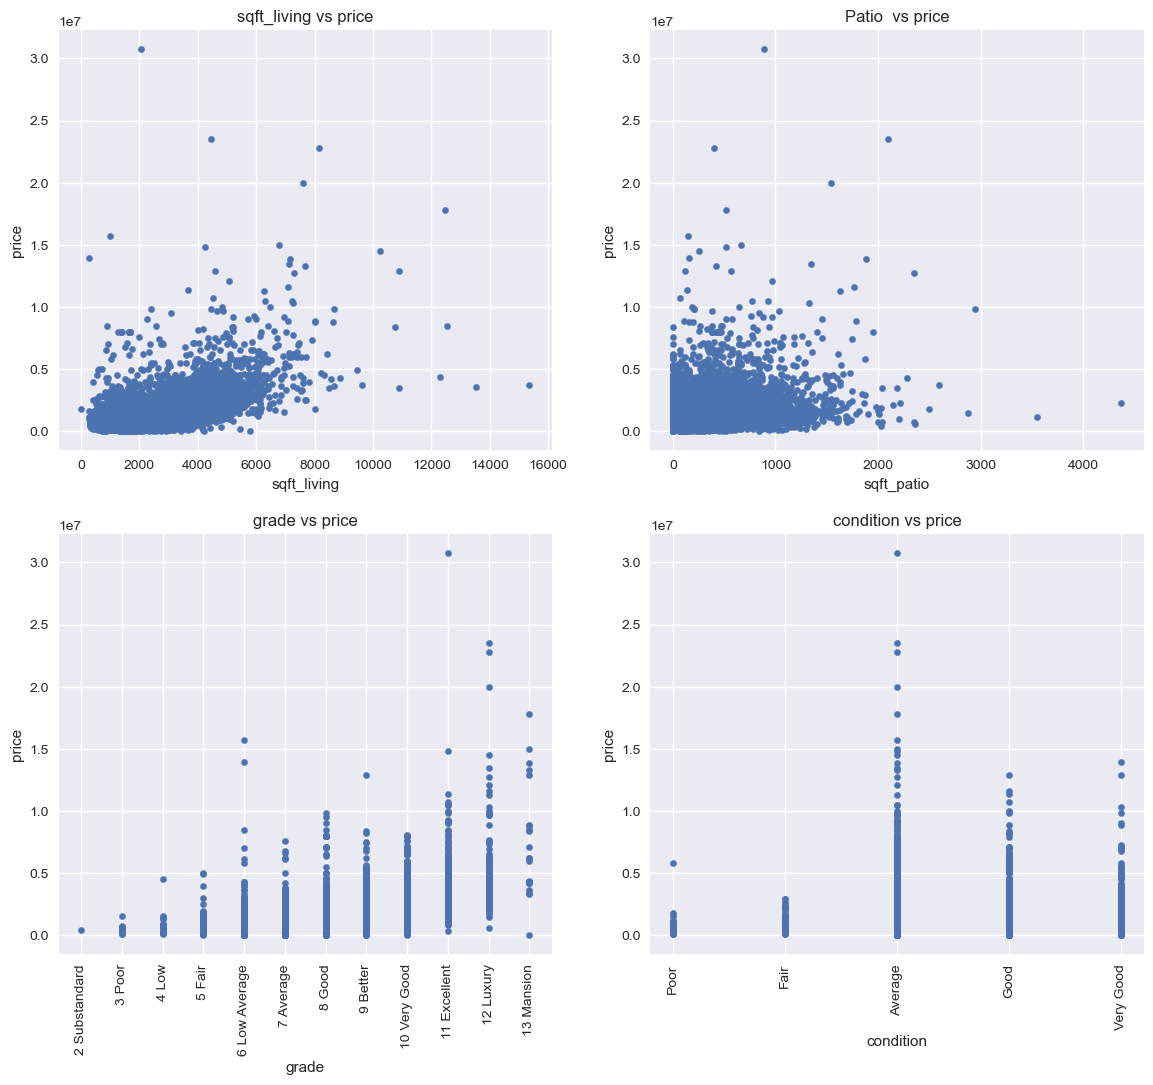

In [24]:
# scatter plot of variables which may have a high correlation with price

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="price", ax=axes[0][0]).set_title('sqft_living vs price')
df.plot.scatter(x="sqft_patio", y="price", ax=axes[0][1]).set_title('Patio  vs price')
df.plot.scatter(x="grade", y="price", ax=axes[1][0], rot=90).set_title('grade vs price')
df_cond_order.plot.scatter(x="condition", y="price", ax=axes[1][1], rot=90).set_title('condition vs price');


Living room size and grade appear to have some relationship with price, but it is far from perfectly linear. Patio size does not have an obvious realtionship. Condition do not appear to have a linear relationship with price- most of the highest selling homes were in average condition. However, those in poor and fair condition appear to have sold for much less. 

# Modeling and Results

### Simple linear regression model with Living room size as the independent variable
Since living room size had the highest correlation with sale price, I will use it for the independent variable in the simple linear regression model.

In [25]:
# define X and y
y0 = df["price"]
X0_baseline = df[["sqft_living"]]

In [26]:
# fit the model

baseline_model0 = sm.OLS(y0, sm.add_constant(X0_baseline))
baseline_results0 = baseline_model0.fit()

print(baseline_results0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:16   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      

### Interpretation:

 37% of the variation in sale price is explained by the model. The model is statistically significant overall, with an F-statistic p-value well below 0.05. Both the coeficient for living room size and the constant are significant. Each additional square foot of living room space adds $560 to the price. 



#### Visualize residuals

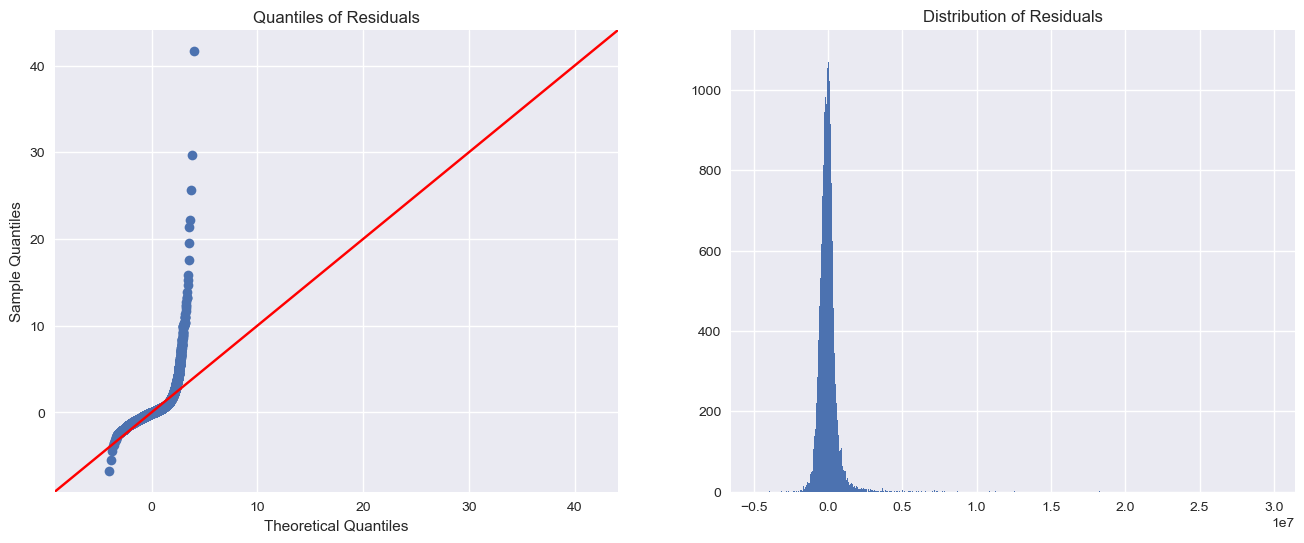

In [27]:
# plot residuals
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_results0.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_results0.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The residuals do not follow a normal distribution- from the QQ plot it is clear there is a very heavy right skew- this is indicating outliers with an extremely high price are affecting the model performance. This violates an assumption of linnear regression, and I will make transformations to the variables to find out if a better model can be produced. 

#### Compare error metrics

In [28]:
mae = baseline_results0.resid.abs().sum() / len(y0)
rmse = ((baseline_results0.resid ** 2).sum() / len(y0)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  396253.8351884112 
 RMSE:  711342.1481571258


The MAE is \\$396,000. Using this as the metric means the model could be off by that amount in either direction when predicting the value of a home. This seems rather large of an error, again indicating this model does not perform well. 
The RMSE, which is more sensitive to outliers, is much larger- \\$736,000, which suggests the model could be off by that amount. This amount is larger than the price of many homes, and again points to the fact that outliers are contributing to an unreliable model.


### Remove outliers

Since the previous model was affected by extreme outliers, I am going to remove them and test the new model. The general definition of an outlier is a value either above the 75th quartile plus 1.5 times the interquartile range, or below the 25th quartile minus the interquartile range. I will remove outlier values on either end.

In [29]:
# find the iqr
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1


# Remove outliers from DataFrame

df['price'] = df.loc[df['price'] < q3 + (1.5 * iqr), 'price']
df['price'] = df.loc[df['price'] > q1 - (1.5 * iqr), 'price']

In [30]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 30071 to 21111
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          28120 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sq

In [31]:
df.isnull().sum()

id                  0
date                0
price            1990
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
greenbelt           0
nuisance            0
view                0
condition           0
grade               0
heat_source         0
sewer_system        0
sqft_above          0
sqft_basement       0
sqft_garage         0
sqft_patio          0
yr_built            0
yr_renovated        0
address             0
lat                 0
long                0
city                0
dtype: int64

In [32]:
#remove null
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28120 entries, 30071 to 6430
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28120 non-null  int64  
 1   date           28120 non-null  object 
 2   price          28120 non-null  float64
 3   bedrooms       28120 non-null  int64  
 4   bathrooms      28120 non-null  float64
 5   sqft_living    28120 non-null  int64  
 6   sqft_lot       28120 non-null  int64  
 7   floors         28120 non-null  float64
 8   waterfront     28120 non-null  object 
 9   greenbelt      28120 non-null  object 
 10  nuisance       28120 non-null  object 
 11  view           28120 non-null  object 
 12  condition      28120 non-null  object 
 13  grade          28120 non-null  object 
 14  heat_source    28120 non-null  object 
 15  sewer_system   28120 non-null  object 
 16  sqft_above     28120 non-null  int64  
 17  sqft_basement  28120 non-null  int64  
 18  sqf

In [33]:
df['price'].describe()

count    2.812000e+04
mean     9.419833e+05
std      4.347023e+05
min      2.736000e+04
25%      6.300000e+05
50%      8.299925e+05
75%      1.199950e+06
max      2.275182e+06
Name: price, dtype: float64

Mean price is now \\$940k, and the median is \\$830k. These two values are closer than the original dataset. 


#### Visualize new distribution of sale price

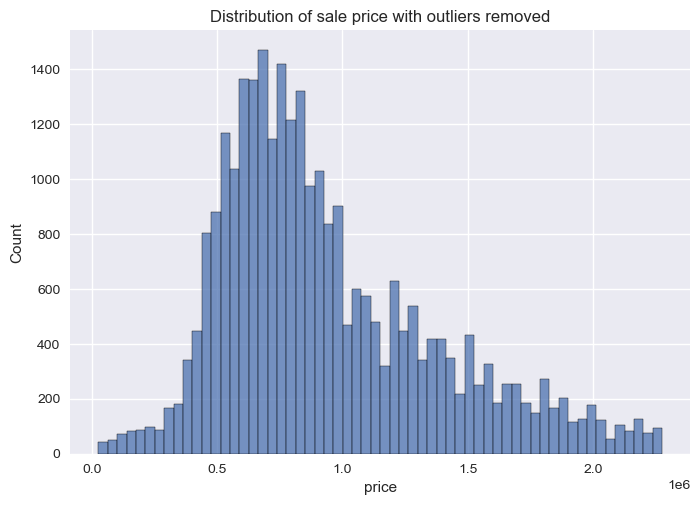

In [34]:
# distribution of price
sns.histplot(df['price'], bins='auto').set_title('Distribution of sale price with outliers removed');

While the distribution of price still has a positive skew, meaning that houses selling for above average prices are pulling the mean up. The peak looks much better. 

#### Examine model with outliers removed

In [35]:
# define X and y and fit the model

y = df["price"]
X_baseline = df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:21   Log-Likelihood:            -3.9956e+05
No. Observations:               28120   AIC:                         7.991e+05
Df Residuals:                   28118   BIC:                         7.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.308e+05   5738.592     57.648      

### Interpretation:

 32% of the variation in sale price is explained by the model. The model is statistically significant overall. Both the coeficient for living room square foot and the constant are significant. Each additional square foot of living room space adds $307 to the price. 



#### Visualize residuals

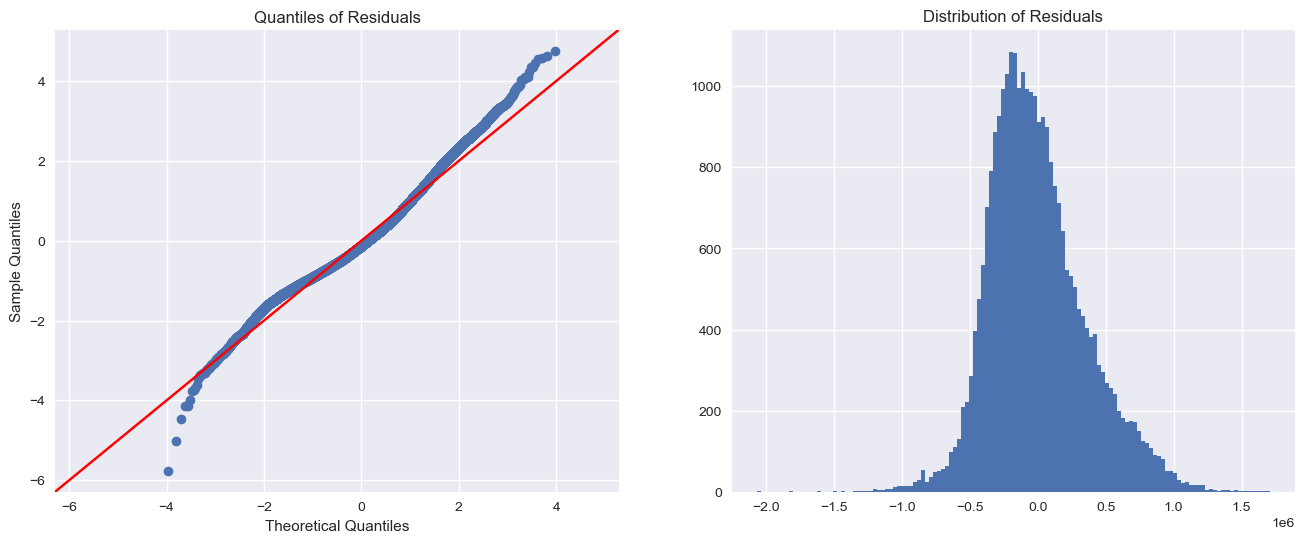

In [36]:
# plot residuals
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

While this model has a lower r squared, the distribution of the residuals is much better. I am going to continue exploring modules with the outliers removed.

#### Compare error metrics

In [37]:
mae = baseline_results.resid.abs().sum() / len(y)
rmse = ((baseline_results.resid ** 2).sum() / len(y)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  279686.3928750523 
 RMSE:  358714.49070362555


The MAE is $261,000- a decrease in over \\$130,000. The RMSE is down to \\$360,000, which is half that of the previous model. Based on these error metrics and the distribution of residuals, it is clear removing the outliers resulted in a better model.

### Investigate taking the Log of price
Since the distribution of price is still skewed and the residuals are not entirely normally distributed, I will examine taking the logarithm of price.  

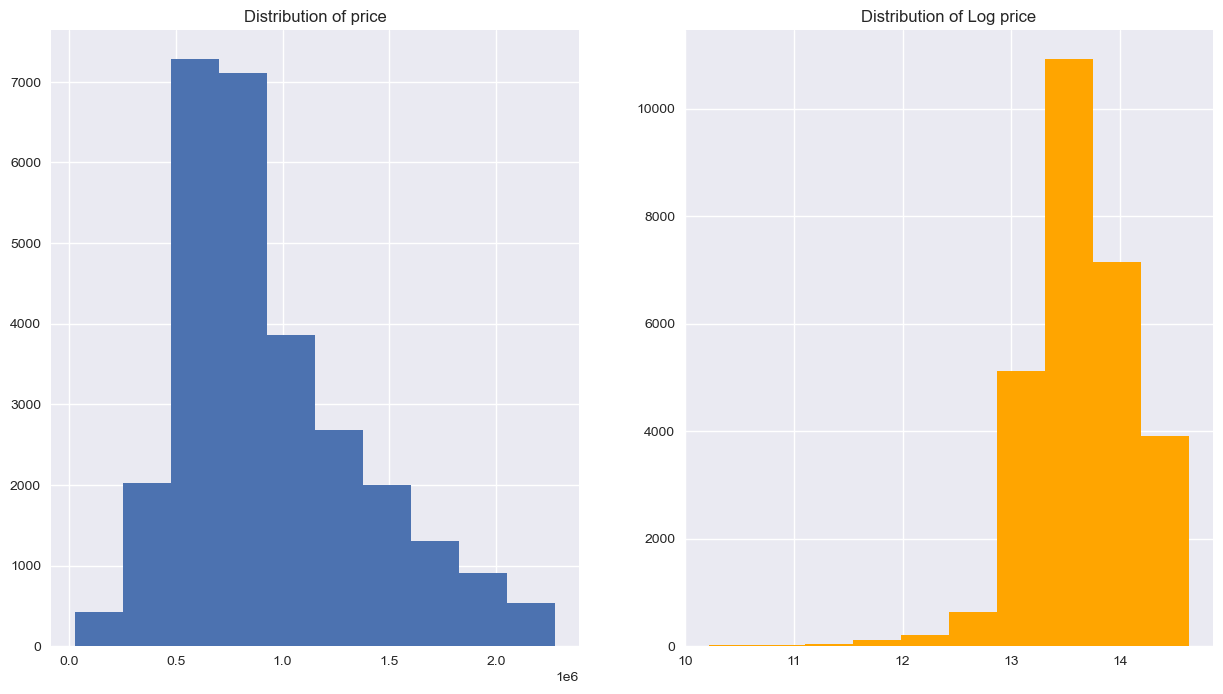

In [38]:
# plot distributions of price and log price
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))
ax1.hist(df['price'], label="price")
ax2.hist(np.log(df['price']), color="orange", label="log(price)")
ax1.set_title("Distribution of price");
ax2.set_title("Distribution of Log price");

Taking the Logarithm of price does not appear to improve the distribution, however I will look at a model with a log transformed price.

In [39]:
#add log price to the dataframe
df['log_price'] = np.log(df['price'])
df_cond_order['log_price'] = np.log(df['price'])


In [40]:
y_log = df['log_price']

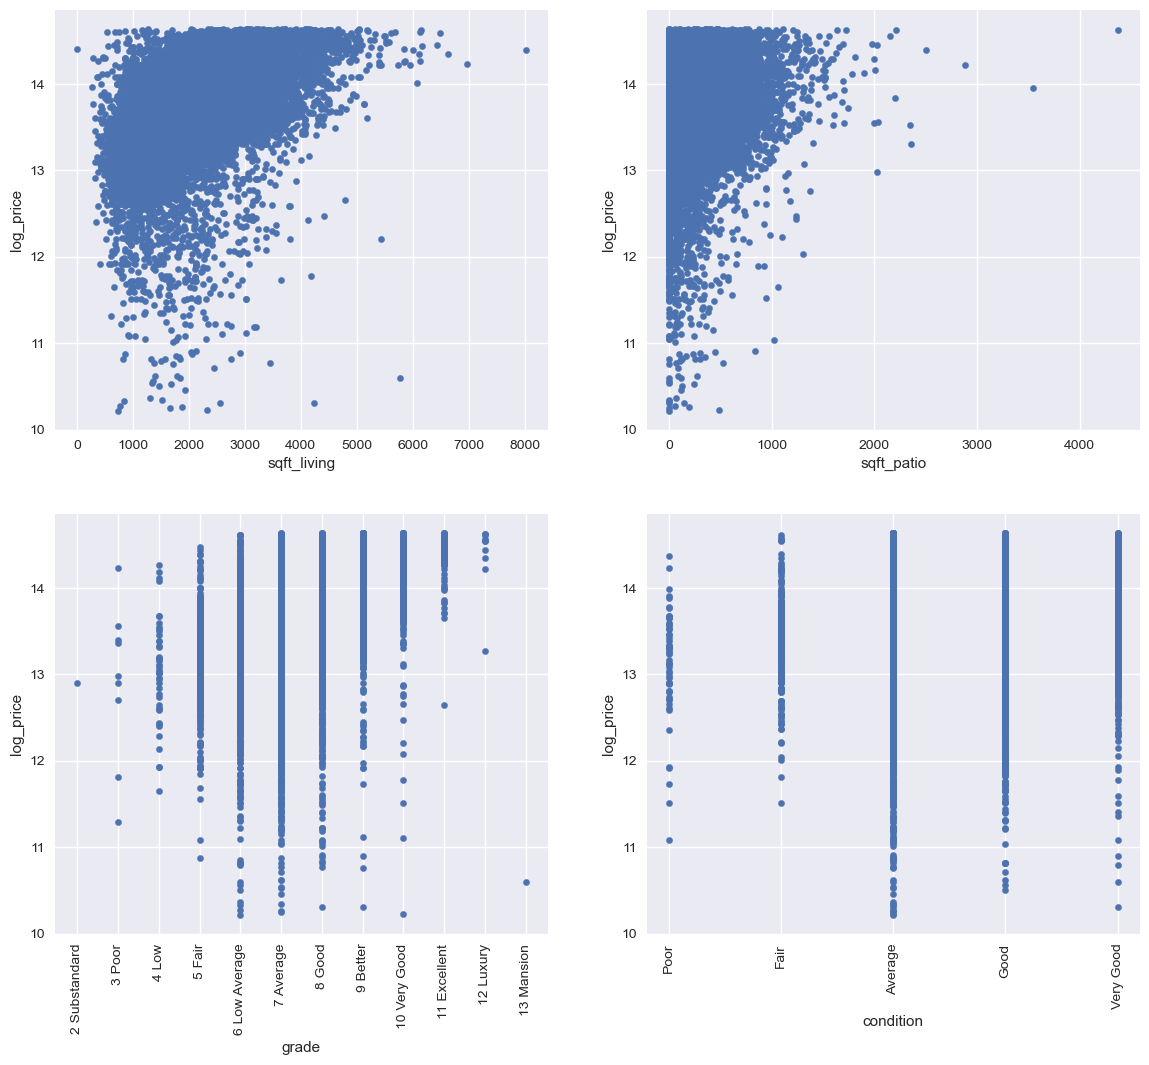

In [41]:
# plot with log price on the y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="log_price", ax=axes[0][0])
df.plot.scatter(x="sqft_patio", y="log_price", ax=axes[0][1])
df.plot.scatter(x="grade", y="log_price", ax=axes[1][0], rot=90)
df_cond_order.plot.scatter(x="condition", y="log_price", ax=axes[1][1], rot=90);
#fig.tight_layout();               

The relationships do not appear linear, indicating the model will likely perform poorly.

### Simple linear regression model with log tranformed target variable

In [42]:
baseline_log_y_model = sm.OLS(y_log, sm.add_constant(X_baseline))
baseline_log_y_results = baseline_log_y_model.fit()

print(baseline_log_y_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     9990.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:26   Log-Likelihood:                -15351.
No. Observations:               28120   AIC:                         3.071e+04
Df Residuals:                   28118   BIC:                         3.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0276      0.007   1949.688      

### Interpretation:
26% of the variation in sale price is explained by this model. The model and coefficieents are both significant. Because the coefficient for living room size is small (< 0.1), we can say that each additional square foot of living room space adds a .03\% increase in price. This is a lower r squared value than the previous models.


#### Visualize residuals

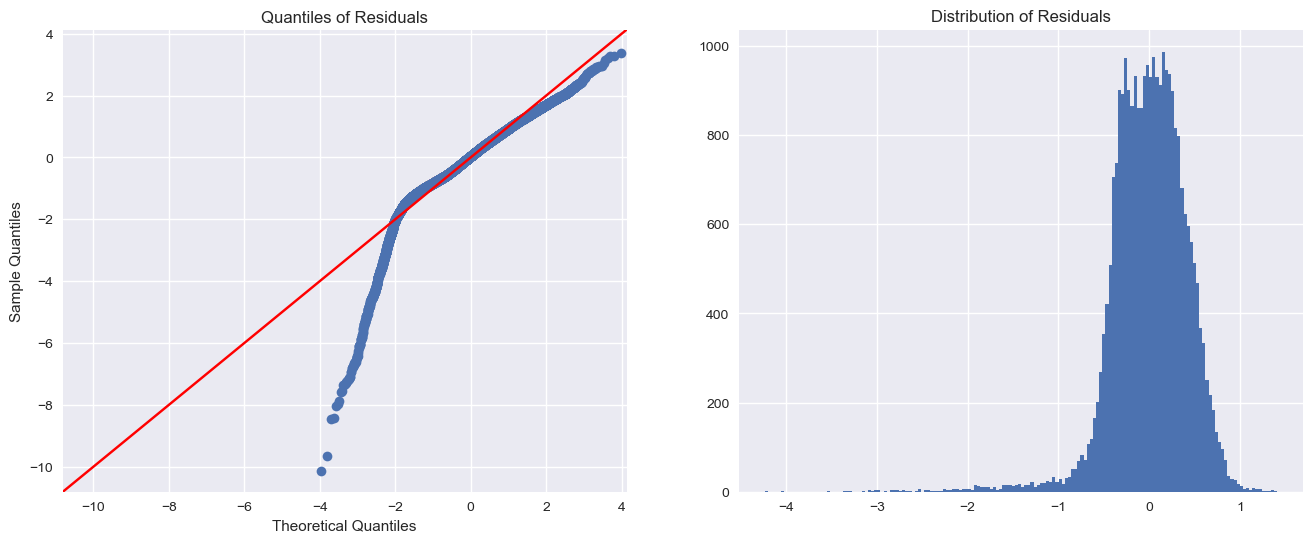

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_log_y_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_log_y_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The distribution of the residuals is farther from a normal distribution than the last model, especially with the lower values.  

#### Compare error metrics

In [44]:
mae = baseline_log_y_results.resid.abs().sum() / len(y0)
rmse = ((baseline_log_y_results.resid ** 2).sum() / len(y0)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  0.29079803483743183 
 RMSE:  0.4036401829911204


The MAE is .29, meaning the model could be off by 29% in either direction when predicting the value of a home.
Based on the RMSE, the model could be off by 40%. This seems unreliably large, indicating this model is not going to perform well.

### Log transform the independent variable 

In [45]:
X_log = np.log(df['sqft_living'])

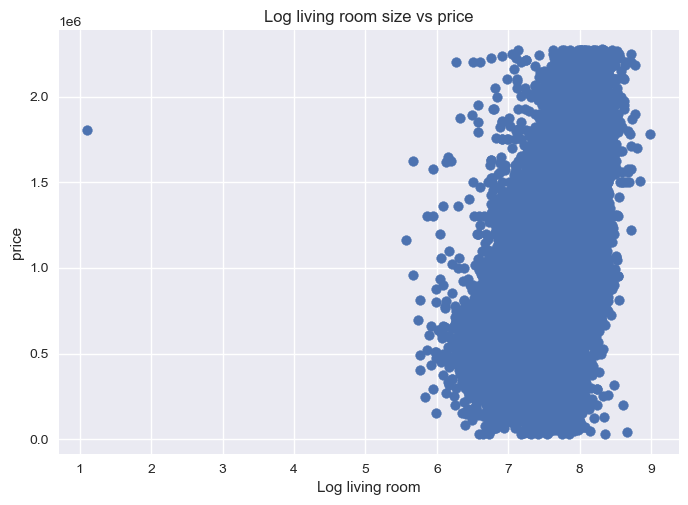

In [46]:
plt.scatter(x=X_log, y=df['price'])
plt.title('Log living room size vs price')
plt.xlabel('Log living room')
plt.ylabel('price');

This does not look like a good relationship. There appears to be one extreme outlier with an extremely small living room.

In [47]:
baseline_log_x_model = sm.OLS(y, sm.add_constant(X_log))
baseline_log_x_results = baseline_log_x_model.fit()

print(baseline_log_x_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 1.161e+04
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:28   Log-Likelihood:            -4.0011e+05
No. Observations:               28120   AIC:                         8.002e+05
Df Residuals:                   28118   BIC:                         8.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.361e+06      4e+04    -84.032      

### Interpretation:
29% of the variation in sale price is explained by the model. The model and coeficients are significant. For each increase of 1% living room size, there is about a $5,100 increase in price. 



#### Visualize residuals

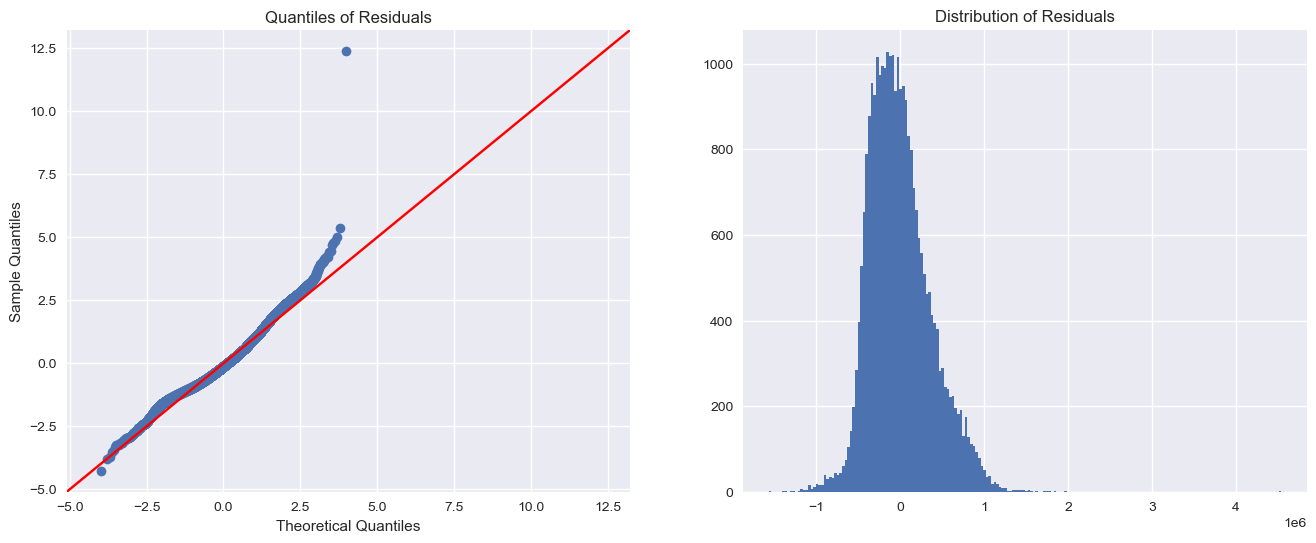

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_log_x_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_log_x_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

There appears to be one extreme outlier.

#### Compare error metrics

In [49]:
mae = baseline_log_x_results.resid.abs().sum() / len(y0)
rmse = ((baseline_log_x_results.resid ** 2).sum() / len(y0)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  268242.2763667426 
 RMSE:  353417.2931451212


The MAE is $268,000, and RMSE is \\$353,000- noticeably larger than the untransformed model. I will not be log transforming the variables in future models.

### Add grades to the baseline model 

There seemed to be some sort of relationship between grade and price, so I will now add grades to the model. I will use 'grade_7 Average' as my reference variable, thus dropping it from the dataframe after creating dummy variables. This means that all grade coefficients are in relation to an average grade.

In [50]:
# create dummy variables, and drop the average
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=["grade"]) 
df2.drop('grade_7 Average', axis=1, inplace=True)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'city', 'log_price',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

In [51]:
X0 = df2[['sqft_living',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better']]

In [52]:
model0 = sm.OLS(y, sm.add_constant(X0))
model0_results = model0.fit()

print(model0_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1448.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:30   Log-Likelihood:            -3.9820e+05
No. Observations:               28120   AIC:                         7.964e+05
Df Residuals:                   28107   BIC:                         7.965e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.627e+05   6

### Interpretation:
38% of the variation in sale price is explained by the model. A grade of 'Average' is the reference variable, meaning the coefficients for other grades are in relation to an 'average' grade house.

Grade 2, Grade 3, and Grade 4 do not have a coefficient that is significant. All other grades do.
As could be expected, grades below average (5 and 6) have a negative coefficient, indicating that house value decreases with a lower quality grade. For example, those with a grade of 'Fair' have an average of $67,000 decrease in value compared to an average house.

Housing prices increase with each grade above average, up until 'Excellent', which had a $587,900 price than average grade. 'Luxury' saw a small decrease, and 'Mansion' was below that of an average grade house. This is an unexpected result and worth investigating further- the likely reason is because we removed outliers, and mansion grade houses were likely to have sold for high prices.

For each increase of squarefoot living room, there is an associated $197 increase price- a large decrease from the model with just living room size as the only variable.



#### Visualize residuals

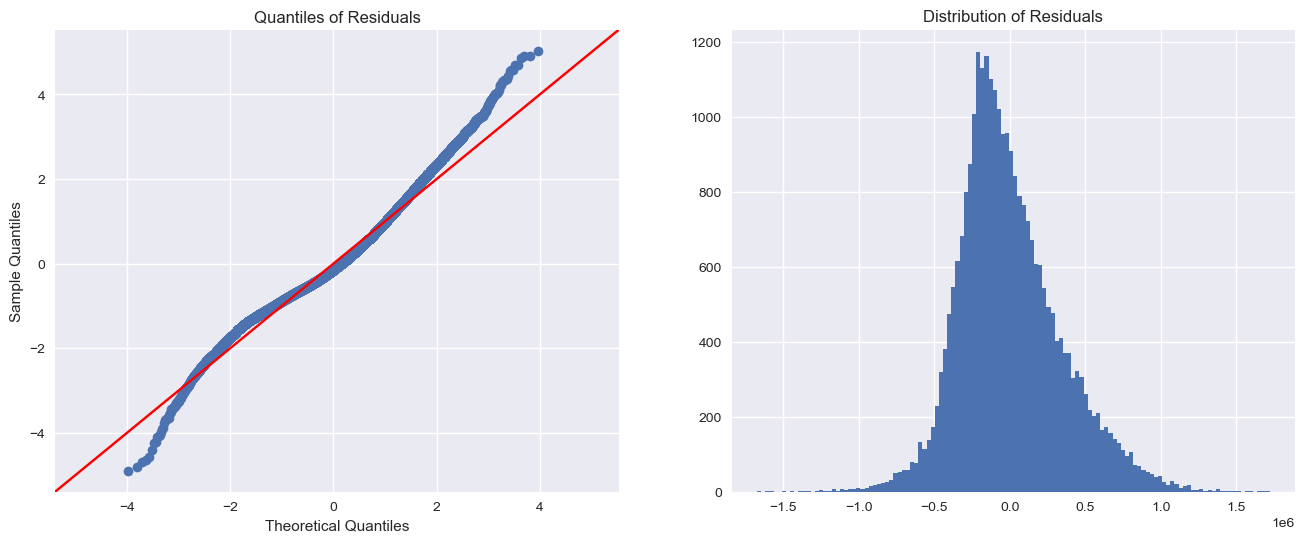

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model0_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model0_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The residuals are fairly close to meeting the assumptions.

#### Compare error metrics

In [54]:
mae = model0_results.resid.abs().sum() / len(y)
rmse = ((model0_results.resid ** 2).sum() / len(y)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  264350.88510765665 
 RMSE:  341736.51265457406


The MAE is \\$247,000 and RMSE is \\$342,000, which is the lowest yet for both metrics. 

### Add condition to the model

One could expect condition to have an impact on price, but the visualizations did not suggest a strong relationship. We will add it to the model and see. Once again, I am using average condition as the reference variable, so the coefficients for other conditions are in relation to a house of average condition.

In [55]:
df2 = pd.get_dummies(df2, columns=["condition"]) #, drop_first=True
df2.drop('condition_Average', axis=1, inplace=True)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'city', 'log_price', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_8 Good', 'grade_9 Better',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good'],
      dtype='object')

In [56]:
X1 = df2[['sqft_living',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good']]

In [57]:
model1 = sm.OLS(y, sm.add_constant(X1))
model1_results = model1.fit()

print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1148.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:32   Log-Likelihood:            -3.9789e+05
No. Observations:               28120   AIC:                         7.958e+05
Df Residuals:                   28103   BIC:                         7.960e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.294e+05   6

### Interpretation:
39.5% of the variation in sale price is explained by the model, a slight (1.3%) increase from the previous model. Both the model and intercept are significant. A grade of 'Average' and average condition are the reference variables, meaning the coefficients for other grades are in relation to an 'average' grade house and one of average condition.

Grade 2, 3, and 4 are, again, the grades with a coefficient that is not significant. 
Grades 5 and 6- below average- still have a negative coefficient, still indicating that house value decreases with a lower quality grade. 

Housing prices for those with a grade above average still follow the same pattern as the module above.

The coeficcients for poor and fair condition are not significant. For houses in good condition, sale price was \\$76,660 above an average house, and those in very good condition sold for \\$150,000 more. Therefore, it is likely worth it to improve the condition of the house in order to increase its value.

For each increase of squarefoot living room, there is still an associated $190 increase price, a small decrease from the last model. 

Overall, this model seems to perform slightly better than the previous model.



#### Visualize residuals

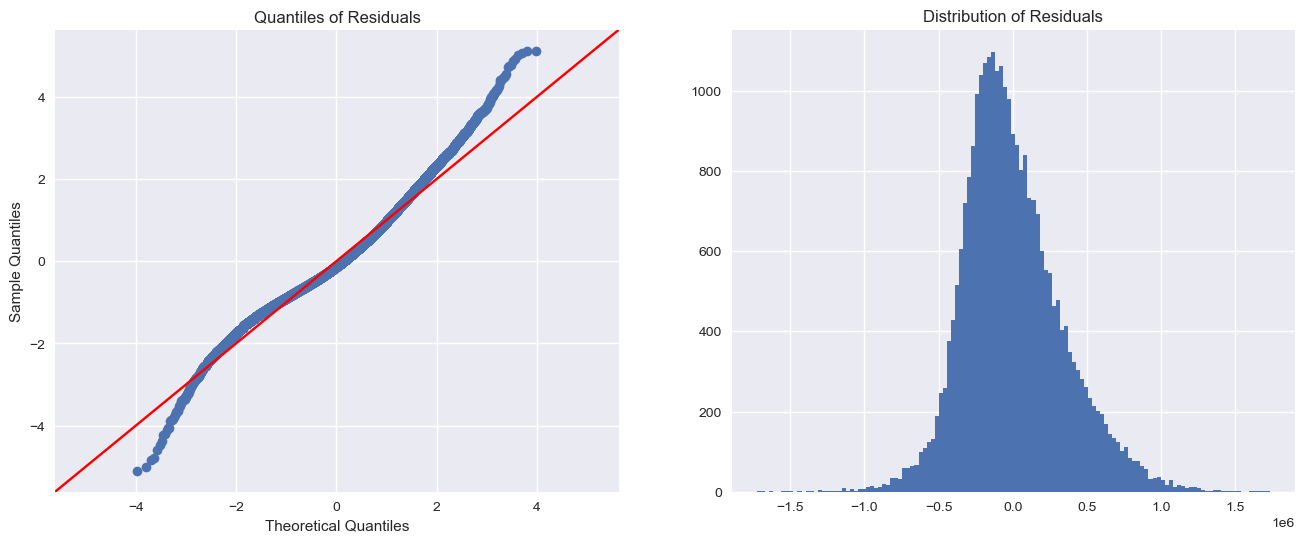

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model1_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model1_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

#### Compare error metrics

In [59]:
mae = model1_results.resid.abs().sum() / len(y0)
rmse = ((model1_results.resid ** 2).sum() / len(y)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  244101.56207157555 
 RMSE:  338040.4717681779


The MAE is $244,000 and RMSE is \\$338,000, which is slightly lower than the previous model. 

### Add Patio sqft to the model

Patio size had a moderate correlation with sale price, so I am going to investigate adding it to the model.

In [60]:
X2 = df2[['sqft_living', 
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'sqft_patio']]

model2 = sm.OLS(y, sm.add_constant(X2))
model2_results = model2.fit()

print(model2_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1083.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:34   Log-Likelihood:            -3.9788e+05
No. Observations:               28120   AIC:                         7.958e+05
Df Residuals:                   28102   BIC:                         7.959e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.281e+05   6

### Interpretation:
39.6% of the variation in sale price is explained by the model, a miniscule increase (0.01%) from the previous model. However, the adjusted r-squared value of .395 is identical to the model without patio size.

The coefficients for grade and condition follow a similar pattern to the model above.

For each increase of squarefoot living room, there is now an associated \\$186 increase price, and for each increase in squarefoot patio size, a \\$50 increase price.

This model seems hardly better than the one without patio size.

#### Visualize residuals

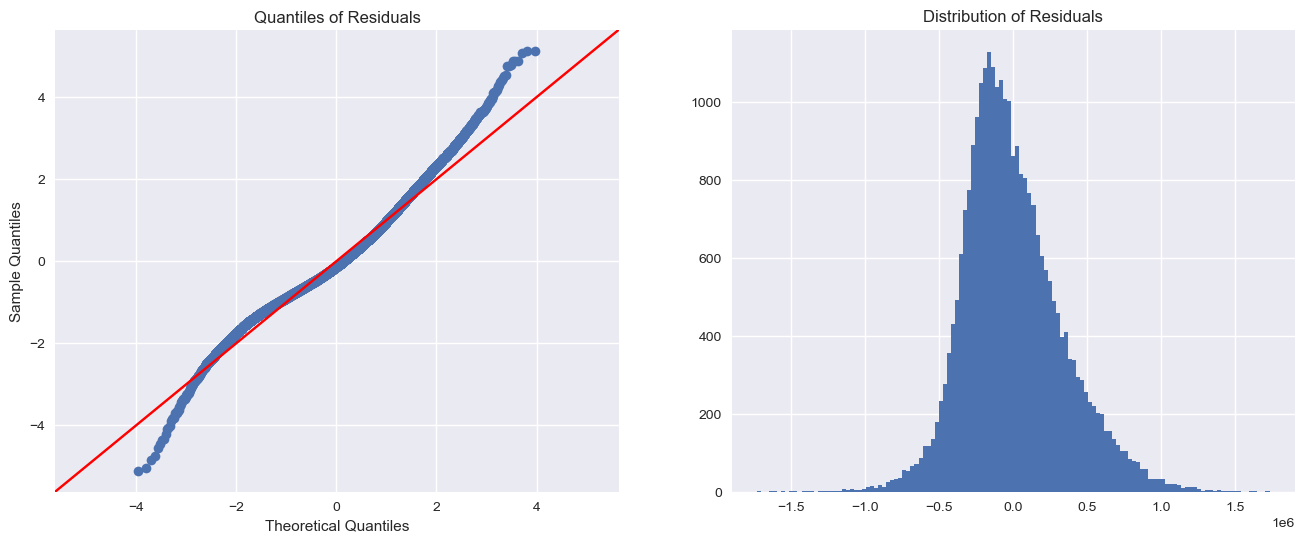

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model2_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model2_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

#### Compare error metrics

In [62]:
mae = model2_results.resid.abs().sum() / len(y0)
rmse = ((model2_results.resid ** 2).sum() / len(y)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  244011.94711202558 
 RMSE:  337873.8134386867


The MAE is \\$244,000 and RMSE is just under \\$338,000, which is nearly identical to the model without patio size. 

### Does a model with many independent variables seem any better?

In [63]:
X3 = df2[['sqft_living', 'sqft_above',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'bathrooms', 'floors', 'sqft_patio', 'bedrooms']]

model3 = sm.OLS(y, sm.add_constant(X3))
model3_results = model3.fit()

print(model3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     888.5
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:36   Log-Likelihood:            -3.9781e+05
No. Observations:               28120   AIC:                         7.957e+05
Df Residuals:                   28098   BIC:                         7.958e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.917e+05   1

### Interpretation:
 39.9% of the variation in sale price is explained by the model, hardly a change from the model that included living room size, grade, and condition. 
 
Number of bedrooms and floors seem to negatively affect sale price.
 
There is not a tremendous change in the coefficients of living room size, grade, or condition. The p-value for bathrooms is not significant. It is worth noting that there is a high correlation between bathrooms and living room size. This module is hardly any better than the model with just Squarefoot living room and grade, and this model includes highly correlated variables. 


#### Visualize residuals

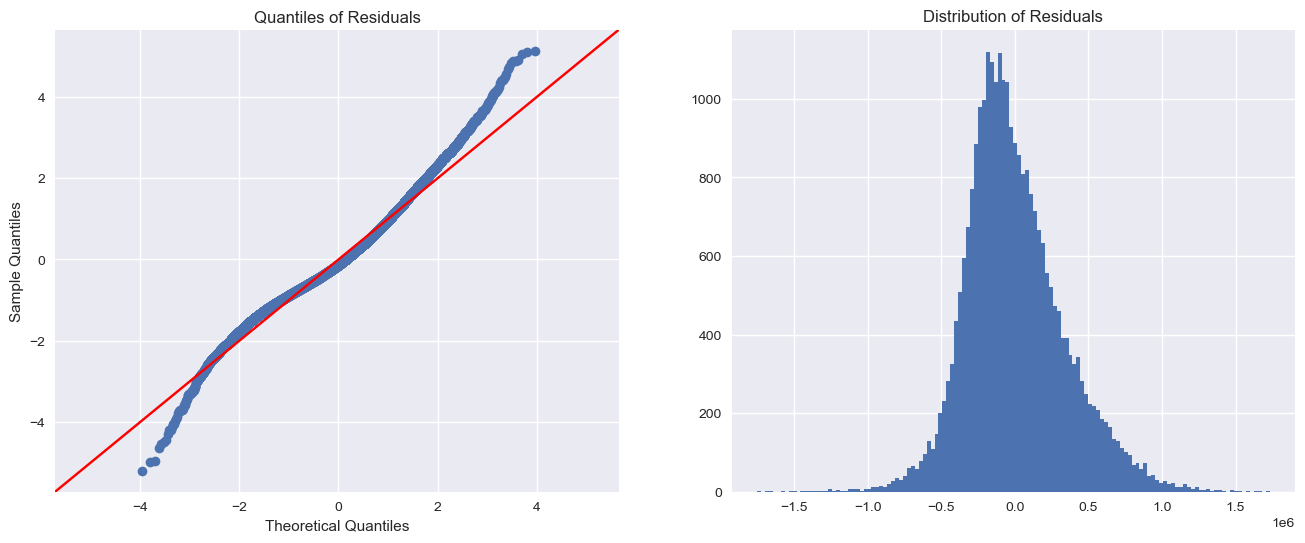

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model3_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model3_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

#### Compare error metrics

In [65]:
mae = model3_results.resid.abs().sum() / len(y)
rmse = ((model3_results.resid ** 2).sum() / len(y)) ** 0.5
print('MAE: ', mae,'\n','RMSE: ',rmse)

MAE:  259866.64096048058 
 RMSE:  336980.1071419595


The MAE is $243,000, and RMSE is \\$337,000, which is very close to the model with just living room size, grade, and condition. 

# Conclusions

Based on the results of the analysis, my recommendations for home renovations are to:

Enlarge the living room. Living room size had the highest correlation with sale price, more so than even the size of the house. A spacious living room is likely to enhance the value and provide renters with a sense of comfort and community.

Use high quality materials and pay attention to design qualty. For example, tile flooring in the bathrooms, good quality hardwood or bamboo in the interior, exterior, and flooring, and ceramic countertops can greatly add to the quality. In addition, a solid concrete foundation will ensure the house is sturdy, however, the use of concrete in building materials should be limited. The use of plastics should also be avoided.

Ensure any underlying issues or problems with the house structure or design are addressed. 


# Limitations and Next steps

More research should be done to determine the specific styles, designs, and materials associated with an increase in home value.In addition, it would also be worth investigating if there are different factors in different locations- ie does the grade of a home in Seattle increase value more than in outlying areas?

Because outliers were removed, extremely high priced mansion grade homes were left out. Thus, these models may not accurately reflect how best to increase the value of a mansion. However, since mansions are already valued way above average homes, it is unlikely to be worth the cost to renovate them. 